In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install matplotlib numpy
!pip install nltk
!pip install seaborn
!pip install sklearn
!pip install gensim
!pip install pyldavis
!pip install wordcloud
!pip install textblob
!pip install spacey
!pip install textstat
!pip install gensim

import seaborn as sns
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2022-12-06 09:14:57.734280: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 63.0 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pandas as pd
import numpy as np
import io
import tweepy
import json
import csv
import os
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

import re
import pandas as pd
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving CMU_MisCov19_dataset.csv to CMU_MisCov19_dataset (1).csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['CMU_MisCov19_dataset.csv']))

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving DATA-I.csv to DATA-I (1).csv


In [ ]:
df2= pd.read_csv(io.BytesIO(uploaded['DATA-I.csv']))

In [ ]:
df.head()

,status_id,status_created_at,annotation1,annotation2
0,1237387231779840000,Tue Mar 10 14:38:00 +0000 2020,irrelevant,NaN
1,1240175235304960000,Wed Mar 18 07:16:32 +0000 2020,irrelevant,NaN
2,1241324844920320000,Sat Mar 21 11:24:40 +0000 2020,irrelevant,NaN
3,1241872361743360000,Sun Mar 22 23:40:18 +0000 2020,irrelevant,NaN
4,1243024442621440000,Thu Mar 26 03:58:16 +0000 2020,irrelevant,NaN


Current dataset only shows teh status_id, not the tweet itself. Hence, we want to create a new column called "tweets" which has the texts

#Fetching Tweet texts


###Connecting to Tweepy

In [ ]:
# authorizations
consumer_key = 'D3DyHro2vKXvk5gqzki8L3aUS'
consumer_secret = 'dNAJb8qFFgMZQKIZU7GJkREHFf3hXWtpac34Vm9OrtXHAgTBFD'
access_token = '1313304147412897793-ZQg677HsXDhvwRiNbtP5DnBAlFnFBU'
access_token_secret = 'M5TvrUgjRn7vUvke2EArULm4HsKUBqslTTiKDwbpGwA5E'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)


###Fetch tweets and append to df

In [ ]:
#takes so fcking long

def fetchtext(value):
    try:
        return api.get_status(value).text
    except:
        return "na"

df['tweets'] = df.status_id.apply(lambda x: fetchtext(x))
df2['tweets'] = df2.tweet_id.apply(lambda x: fetchtext(x))



In [ ]:
df.to_csv('dataset1.csv',encoding='utf-8')
df2.to_csv('dataset2.csv',encoding='utf-8')

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving dataset1.csv to dataset1 (2).csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['dataset1.csv']))

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving dataset2.csv to dataset2 (2).csv


In [ ]:
df2 = pd.read_csv(io.BytesIO(uploaded['dataset2.csv']))

##Remove ireelevant tweets

In [ ]:
df_cleaned = df[df.annotation1 != "irrelevant"]

try:
  df_cleaned = df[df.tweets != "na"]
except:
    df_cleaned = df

try:
  df2_cleaned = df2[df.tweets != "na"]
except:
  df2_cleaned = df2

<ipython-input-41-5313f17c7261>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2_cleaned = df2[df.tweets != "na"]


In [ ]:
df_cleaned

,Unnamed: 0,status_id,status_created_at,misinformation,annotation1,annotation2,tweets
0,0,1237387231779840000,Tue Mar 10 14:38:00 +0000 2020,2020,irrelevant,NaN,"PAGS PARODY! Plus, Joe talks coronavirus and h..."
1,1,1240175235304960000,Wed Mar 18 07:16:32 +0000 2020,2020,irrelevant,NaN,#coronavirus shows that racists have absolutel...
2,2,1241324844920320000,Sat Mar 21 11:24:40 +0000 2020,2020,irrelevant,NaN,@Laura1206 @ShitChester I would expect front l...
4,4,1243024442621440000,Thu Mar 26 03:58:16 +0000 2020,2020,irrelevant,NaN,The coronavirus is not only affecting the way ...
6,6,1273803569758720000,Fri Jun 19 02:23:31 +0000 2020,2020,politics,NaN,I hope your father recovers from the virus as ...
...,...,...,...,...,...,...,...
4567,4567,1280644123645620227,Tue Jul 07 23:25:26 +0000 2020,2020,politics,NaN,"#TakeYourSAT Parents of America, please don't ..."
4568,4568,1280654762950774785,Wed Jul 08 00:07:43 +0000 2020,2020,calling out or correction,NaN,Da fark is wrong with these people?!\n\nhttps:...
4569,4569,1280669090835828738,Wed Jul 08 01:04:39 +0000 2020,2020,fake cure,NaN,Doctor Finds Cure to COVID-19 (without Vaccine...
4570,4570,1280675380014309376,Wed Jul 08 01:29:39 +0000 2020,2020,calling out or correction,NaN,I can’t believe people legitimately think that...


In [ ]:
df2_cleaned

,Unnamed: 0,tweet_id,tweets
0,0,1286643297402920960,@senadormotoa @MinSaludCol Equivocado de princ...
1,1,1265084253357907969,"Ian Haydon, who is participating in a vaccine ..."
2,2,1270649437111672838,দাবী: ছ'চিয়েল মিডিয়াত প্ৰচাৰ হৈ থকা এখন ফটো ...
4,4,1253761766787555335,"Protesters at state Capitol are chanting ""Wher..."
6,6,1270081492908216320,1/2\n\n@WHO recently published a summary of tr...
...,...,...,...
1753,1753,1240084307965882371,na
1754,1754,1254353083355799554,The main argument I'm getting against my prior...
1756,1756,1238215769445388288,I feel like this is the video that perfectly d...
1757,1757,1220384112508272646,More and more...\n\nhttps://t.co/z5Dpu7RASa


In [ ]:
df_cleaned.loc[:, ("status_created_at")]= '2020'

In [ ]:
df2_cleaned.loc[:, ("status_created_at")]= '2020'

In [ ]:
df2_cleaned.insert(loc=2,
          column='misinformation',
          value=1)

In [ ]:
df2_cleaned.loc[df['misinformation'] > 2020, 'misinformation'] = 1

In [ ]:
df2_cleaned.insert(loc=3,
          column='sentiment',
          value=0)

In [ ]:
df_cleaned.insert(loc=5,
          column='sentiment',
          value=0)

In [ ]:
misinformation = ['irrelevant', 'politics', 'sarcasm or satire', 'fake cure',
       'conspiracy',
       'false fact or prevention', 'panic buying',
       'commercial activity or promotion', 'emergency', 'fake treatment',
       'false public health response']


df_cleaned['annotation1'] = np.where(df_cleaned['annotation1'].isin(misinformation), '1', '0')


<ipython-input-51-1e3d2c2d2109>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['annotation1'] = np.where(df_cleaned['annotation1'].isin(misinformation), '1', '0')


In [ ]:
df_cleaned.rename({'annotation1': 'misinformation', 'status_created_at': 'date'}, axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [ ]:
df_cleaned = df_cleaned.drop(columns=['annotation2'])

In [ ]:
df_cleaned = df_cleaned.drop(columns=['Unnamed: 0'])

In [ ]:
df_cleaned

,status_id,date,misinformation,misinformation,sentiment,tweets
0,1237387231779840000,2020,2020,1,0,"PAGS PARODY! Plus, Joe talks coronavirus and h..."
1,1240175235304960000,2020,2020,1,0,#coronavirus shows that racists have absolutel...
2,1241324844920320000,2020,2020,1,0,@Laura1206 @ShitChester I would expect front l...
4,1243024442621440000,2020,2020,1,0,The coronavirus is not only affecting the way ...
6,1273803569758720000,2020,2020,1,0,I hope your father recovers from the virus as ...
...,...,...,...,...,...,...
4567,1280644123645620227,2020,2020,1,0,"#TakeYourSAT Parents of America, please don't ..."
4568,1280654762950774785,2020,2020,0,0,Da fark is wrong with these people?!\n\nhttps:...
4569,1280669090835828738,2020,2020,1,0,Doctor Finds Cure to COVID-19 (without Vaccine...
4570,1280675380014309376,2020,2020,0,0,I can’t believe people legitimately think that...


In [ ]:
df_cleaned.columns = ['status_id', 'date', 'wrong', 'misinformation', 'sentiment', 'tweets']

In [ ]:
df_cleaned = df_cleaned.drop(columns=['wrong'])

In [ ]:
df_cleaned

,status_id,date,misinformation,sentiment,tweets
0,1237387231779840000,2020,1,0,"PAGS PARODY! Plus, Joe talks coronavirus and h..."
1,1240175235304960000,2020,1,0,#coronavirus shows that racists have absolutel...
2,1241324844920320000,2020,1,0,@Laura1206 @ShitChester I would expect front l...
4,1243024442621440000,2020,1,0,The coronavirus is not only affecting the way ...
6,1273803569758720000,2020,1,0,I hope your father recovers from the virus as ...
...,...,...,...,...,...
4567,1280644123645620227,2020,1,0,"#TakeYourSAT Parents of America, please don't ..."
4568,1280654762950774785,2020,0,0,Da fark is wrong with these people?!\n\nhttps:...
4569,1280669090835828738,2020,1,0,Doctor Finds Cure to COVID-19 (without Vaccine...
4570,1280675380014309376,2020,0,0,I can’t believe people legitimately think that...


In [ ]:
df_cleaned = df_cleaned.iloc[:, [0,1,4,2,3]]

In [ ]:
df_cleaned

,status_id,date,tweets,misinformation,sentiment
0,1237387231779840000,2020,"PAGS PARODY! Plus, Joe talks coronavirus and h...",1,0
1,1240175235304960000,2020,#coronavirus shows that racists have absolutel...,1,0
2,1241324844920320000,2020,@Laura1206 @ShitChester I would expect front l...,1,0
4,1243024442621440000,2020,The coronavirus is not only affecting the way ...,1,0
6,1273803569758720000,2020,I hope your father recovers from the virus as ...,1,0
...,...,...,...,...,...
4567,1280644123645620227,2020,"#TakeYourSAT Parents of America, please don't ...",1,0
4568,1280654762950774785,2020,Da fark is wrong with these people?!\n\nhttps:...,0,0
4569,1280669090835828738,2020,Doctor Finds Cure to COVID-19 (without Vaccine...,1,0
4570,1280675380014309376,2020,I can’t believe people legitimately think that...,0,0


In [ ]:
df2_cleaned = df2_cleaned.iloc[:, [2,5,1,3,4,0]]

In [ ]:
df2_cleaned.columns = ['status_id', 'date','tweets', 'misinformation', 'sentiment','dropping column']

In [ ]:
df2_cleaned = df2_cleaned.drop(columns=['dropping column'])

In [ ]:
df2_cleaned

,status_id,date,tweets,misinformation,sentiment
0,1286643297402920960,2020,@senadormotoa @MinSaludCol Equivocado de princ...,1,0
1,1265084253357907969,2020,"Ian Haydon, who is participating in a vaccine ...",1,0
2,1270649437111672838,2020,দাবী: ছ'চিয়েল মিডিয়াত প্ৰচাৰ হৈ থকা এখন ফটো ...,1,0
4,1253761766787555335,2020,"Protesters at state Capitol are chanting ""Wher...",1,0
6,1270081492908216320,2020,1/2\n\n@WHO recently published a summary of tr...,1,0
...,...,...,...,...,...
1753,1240084307965882371,2020,na,1,0
1754,1254353083355799554,2020,The main argument I'm getting against my prior...,1,0
1756,1238215769445388288,2020,I feel like this is the video that perfectly d...,1,0
1757,1220384112508272646,2020,More and more...\n\nhttps://t.co/z5Dpu7RASa,1,0


In [ ]:
frames = [df_cleaned, df2_cleaned]

df_merged = pd.concat(frames)
df_merged.to_csv('df_merged.csv',encoding='utf-8')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner_updated(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving df_merged_final.csv to df_merged_final (1).csv


In [ ]:
df_merged = pd.read_csv(io.BytesIO(uploaded['df_merged.csv']))

In [ ]:
df_merged = df_merged.drop(columns=['Unnamed: 0'])

In [ ]:
df_merged

,status_id,date,tweets,misinformation,sentiment
0,1237387231779840000,2020,pags parody plus joe talks coronavirus and has...,1,0
1,1240175235304960000,2020,coronavirus shows that racists have absolutely...,1,0
2,1241324844920320000,2020,would expect front line staff to be more of ri...,1,0
3,1243024442621440000,2020,the coronavirus is not only affecting the way ...,1,0
4,1273803569758720000,2020,hope your father recovers from the virus as so...,1,0
...,...,...,...,...,...
4586,1240084307965882371,2020,na,1,0
4587,1254353083355799554,2020,the main argument getting against my prior thr...,1,0
4588,1238215769445388288,2020,feel like this is the video that perfectly dep...,1,0
4589,1220384112508272646,2020,more and more,1,0


In [ ]:
df_merged['tweets'] = df_merged['tweets'].map(tweet_cleaner_updated)

/usr/local/lib/python3.8/dist-packages/bs4/__init__.py:332: UserWarning: "https://t.co/m1JCA5rWmW" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/bs4/__init__.py:332: UserWarning: "https://t.co/XcGEEUda6g" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/bs4/__init__.py:332: UserWarning: "https://t.co/SWnBAnk0HB" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/bs4/__init__.py:332: UserWarning: "https://t.co/f6wL

In [ ]:
df_merged = df_merged[df_merged.tweets != "na"]
df_merged = df_merged[df_merged.tweets != ""]

In [ ]:
df_merged

,status_id,date,tweets,misinformation,sentiment
0,1237387231779840000,2020,pags parody plus joe talks coronavirus and has...,1,0
1,1240175235304960000,2020,coronavirus shows that racists have absolutely...,1,0
2,1241324844920320000,2020,would expect front line staff to be more of ri...,1,0
3,1243024442621440000,2020,the coronavirus is not only affecting the way ...,1,0
4,1273803569758720000,2020,hope your father recovers from the virus as so...,1,0
...,...,...,...,...,...
4585,1276629360212979712,2020,what does mask do blocks respiratory droplets ...,1,0
4587,1254353083355799554,2020,the main argument getting against my prior thr...,1,0
4588,1238215769445388288,2020,feel like this is the video that perfectly dep...,1,0
4589,1220384112508272646,2020,more and more,1,0


In [ ]:
df_merged.to_csv('df_merged_final.csv',encoding='utf-8')

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4378 entries, 0 to 4590
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   status_id       4378 non-null   int64 
 1   date            4378 non-null   int64 
 2   tweets          4378 non-null   object
 3   misinformation  4378 non-null   int64 
 4   sentiment       4378 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 205.2+ KB


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving df_merged_final.csv to df_merged_final (2).csv


In [ ]:
df_merged = pd.read_csv(io.BytesIO(uploaded['df_merged_final.csv']))

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 2021data.csv to 2021data (4).csv


In [ ]:
df3 = pd.read_csv(io.BytesIO(uploaded['2021data.csv']))

In [ ]:
df3

,status_id,is_misinfo
0,1387438726092050433,0
1,1387438213510410247,1
2,1387434514943602690,0
3,1387434258881421316,0
4,1387434016912072707,0
...,...,...
5714,1413087751474397186,0
5715,1413087030578401283,0
5716,1413085793397186565,1
5717,1413085519710363648,0


In [ ]:
#takes so fcking long

def fetchtext(value):
    try:
        return api.get_status(value).text
    except:
        return "na"

df3['tweets'] = df3.status_id.apply(lambda x: fetchtext(x))



In [ ]:
df3

,status_id,is_misinfo,tweets
0,1387438726092050433,0,The lady at the vaccine site (dose 2! woo!) as...
1,1387438213510410247,1,na
2,1387434514943602690,0,Spilled coffee in my lap on the way to getting...
3,1387434258881421316,0,#Open #ElectionRoll wise #vaccination #Booth...
4,1387434016912072707,0,“Terrific news”: Just 1 dose of a COVID-19 vac...
...,...,...,...
5714,1413087751474397186,0,Going to my first vaccine today. Very very ner...
5715,1413087030578401283,0,"Media: ""The #Japanese government declared a ne..."
5716,1413085793397186565,1,na
5717,1413085519710363648,0,Getting my first dose vaccine tomorrow. HUKM d...


In [ ]:
df3.to_csv('df3.csv',encoding='utf-8')

In [ ]:
df3_cleaned = df3[df3.tweets != "na"]
df3_cleaned = df3_cleaned[df3_cleaned.tweets != ""]

In [ ]:
df3_cleaned.loc[:, ("status_created_at")]= '2021'

In [ ]:
df3_cleaned.loc[:, ("sentiment")]= '0'

In [ ]:
df3_cleaned

,status_id,is_misinfo,tweets,status_created_at,sentiment
0,1387438726092050433,0,The lady at the vaccine site (dose 2! woo!) as...,2021,0
2,1387434514943602690,0,Spilled coffee in my lap on the way to getting...,2021,0
3,1387434258881421316,0,#Open #ElectionRoll wise #vaccination #Booth...,2021,0
4,1387434016912072707,0,“Terrific news”: Just 1 dose of a COVID-19 vac...,2021,0
5,1387433394674470917,1,Canadian doctor defies gag order to inform pub...,2021,0
...,...,...,...,...,...
5713,1413088663886573569,1,"Go ahead, take it...#Vaccine #TheJab #Genocide...",2021,0
5714,1413087751474397186,0,Going to my first vaccine today. Very very ner...,2021,0
5715,1413087030578401283,0,"Media: ""The #Japanese government declared a ne...",2021,0
5717,1413085519710363648,0,Getting my first dose vaccine tomorrow. HUKM d...,2021,0


In [ ]:
df3_cleaned.columns = ['status_id', 'date','tweets', 'misinformation', 'sentiment']

In [ ]:
df3_cleaned = df3_cleaned.iloc[:, [0,3,2,1,4,]]

In [ ]:
df3_cleaned

,status_id,date,tweets,misinformation,sentiment
0,1387438726092050433,2021,The lady at the vaccine site (dose 2! woo!) as...,0,0
2,1387434514943602690,2021,Spilled coffee in my lap on the way to getting...,0,0
3,1387434258881421316,2021,#Open #ElectionRoll wise #vaccination #Booth...,0,0
4,1387434016912072707,2021,“Terrific news”: Just 1 dose of a COVID-19 vac...,0,0
5,1387433394674470917,2021,Canadian doctor defies gag order to inform pub...,1,0
...,...,...,...,...,...
5713,1413088663886573569,2021,"Go ahead, take it...#Vaccine #TheJab #Genocide...",1,0
5714,1413087751474397186,2021,Going to my first vaccine today. Very very ner...,0,0
5715,1413087030578401283,2021,"Media: ""The #Japanese government declared a ne...",0,0
5717,1413085519710363648,2021,Getting my first dose vaccine tomorrow. HUKM d...,0,0


In [ ]:
frames = [df_merged, df3_cleaned]
df_final= pd.concat(frames)
df_final.to_csv('df_final.csv',encoding='utf-8')

In [ ]:
df_final

,Unnamed: 0,status_id,date,tweets,misinformation,sentiment
0,0.0,1237387231779840000,2020,pags parody plus joe talks coronavirus and has...,1,0
1,1.0,1240175235304960000,2020,coronavirus shows that racists have absolutely...,1,0
2,2.0,1241324844920320000,2020,would expect front line staff to be more of ri...,1,0
3,3.0,1243024442621440000,2020,the coronavirus is not only affecting the way ...,1,0
4,4.0,1273803569758720000,2020,hope your father recovers from the virus as so...,1,0
...,...,...,...,...,...,...
5713,NaN,1413088663886573569,2021,"Go ahead, take it...#Vaccine #TheJab #Genocide...",1,0
5714,NaN,1413087751474397186,2021,Going to my first vaccine today. Very very ner...,0,0
5715,NaN,1413087030578401283,2021,"Media: ""The #Japanese government declared a ne...",0,0
5717,NaN,1413085519710363648,2021,Getting my first dose vaccine tomorrow. HUKM d...,0,0


In [ ]:
from google.colab import files
uploaded = files.upload()


KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
sentiment_tweets = pd.read_csv("/content/sentiment_tweets (2).csv")
sentiment_tweets2020 = sentiment_tweets[sentiment_tweets.date == 2020]
sentiment_tweets2020 = sentiment_tweets2020[sentiment_tweets.misinformation == 1]
sentiment_tweets2021 = sentiment_tweets[sentiment_tweets.date == 2021]
sentiment_tweets2021 = sentiment_tweets2021[sentiment_tweets.misinformation == 1]

<ipython-input-8-5233924d4e77>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sentiment_tweets2020 = sentiment_tweets2020[sentiment_tweets.misinformation == 1]
<ipython-input-8-5233924d4e77>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sentiment_tweets2021 = sentiment_tweets2021[sentiment_tweets.misinformation == 1]


In [ ]:
sentiment_tweets2020

,Unnamed: 0,status_id,date,tweets,misinformation,polarity,subjectivity,Sentiment
0,0,1237387231779840000,2020,pags parody plus joe talks coronavirus and has...,1,0.246753,0.512987,1
1,1,1240175235304960000,2020,coronavirus shows that racists have absolutely...,1,-0.116667,0.477778,0
2,2,1241324844920320000,2020,would expect front line staff to be more of ri...,1,0.175000,0.450000,1
3,3,1243024442621440000,2020,the coronavirus is not only affecting the way ...,1,0.068182,0.750000,1
12,18,1227362900970479617,2020,do you think the coronavirus is natural occurr...,1,0.100000,0.400000,1
...,...,...,...,...,...,...,...,...
2316,4474,1276629360212979712,2020,what does mask do blocks respiratory droplets ...,1,0.125000,0.345238,1
2317,4475,1254353083355799554,2020,the main argument getting against my prior thr...,1,0.083333,0.166667,1
2318,4476,1238215769445388288,2020,feel like this is the video that perfectly dep...,1,0.375000,0.725000,1
2319,4477,1220384112508272646,2020,more and more,1,0.500000,0.500000,1


##EDA

In [ ]:
import spacy
from collections import  Counter
import seaborn as sns

def plot_most_common_named_entity_barchart(text, entity="PERSON"):
    nlp = spacy.load("en_core_web_sm")

    def _get_ner(text,ent):
        doc=nlp(text)
        return [X.text for X in doc.ents if X.label_ == ent]

    entity_filtered=text.apply(lambda x: _get_ner(x,entity))
    entity_filtered=[i for x in entity_filtered for i in x]

    counter=Counter(entity_filtered)
    x,y=map(list,zip(*counter.most_common(15)))
    sns.barplot(x=y,y=x).set_title(entity)

NameError: ignored

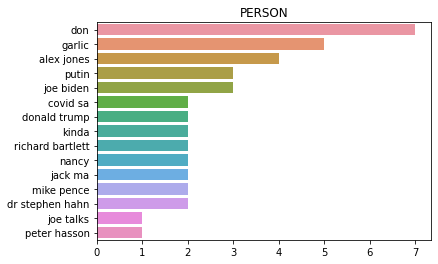

In [ ]:
plot_most_common_named_entity_barchart(sentiment_tweets2020['tweets'], entity="PERSON")

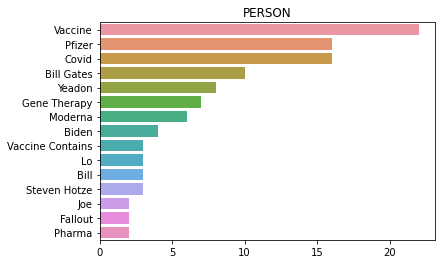

In [ ]:
plot_most_common_named_entity_barchart(sentiment_tweets2021['tweets'], entity="PERSON")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


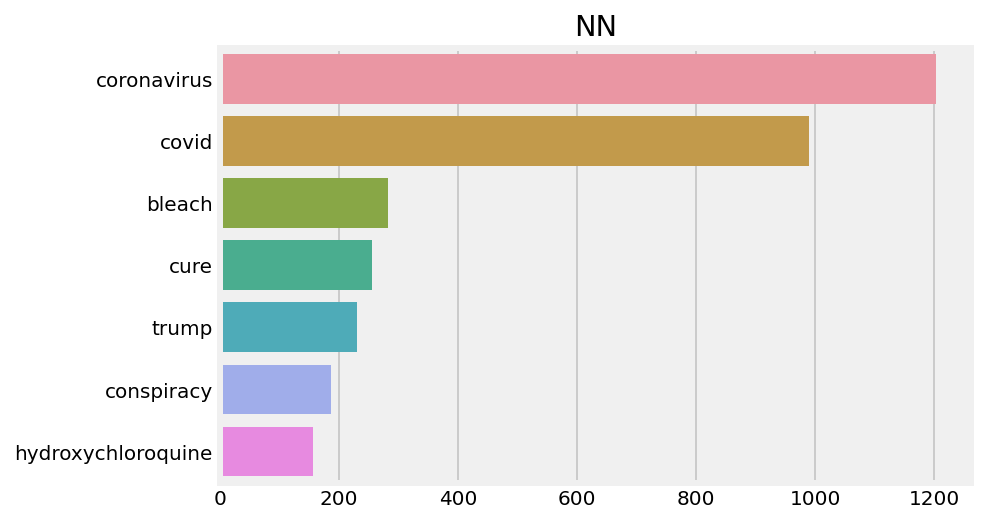

In [ ]:
# Code Snippet for Most Common Part of Speach Barchart

import nltk
from nltk.tokenize import word_tokenize
import seaborn as sns
from collections import Counter

def plot_most_common_part_of_speach_barchart(text, part_of_speach='NN'):
    nltk.download('averaged_perceptron_tagger')

    def _filter_pos(text):
        pos_type=[]
        pos=nltk.pos_tag(word_tokenize(text))
        for word,tag in pos:
            if tag==part_of_speach:
                pos_type.append(word)
        return pos_type


    words=text.apply(lambda x : _filter_pos(x))
    words=[x for l in words for x in l]
    counter=Counter(words)
    x,y=list(map(list,zip(*counter.most_common(7))))
    sns.barplot(x=y,y=x).set_title(part_of_speach)


plot_most_common_part_of_speach_barchart(df_merged['tweets'])